
# Four layered Bragg fiber exact fields

Corresponds to N2 configuration in paper by Bird.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from fiberamp.fiber.microstruct.pbg import ARF2
import ngsolve as ng

importing NGSolve-6.2.2203-56-g47f483033


In [2]:
B = ARF2()

ValueError: Capillary tubes overlap each other.

In [7]:
Draw((ng.x**2 + ng.y**2)**.5,B.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [95]:
ts = [15*1e-6, .42*1e-6, 1.5*.65*15*1e-6, 10*1e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
mats = ['air', 'glass', 'air', 'glass']


In [96]:
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=[.2,.005,.07,.02], wl=1.4e-6)


In [97]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [98]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

67.3385016176912

In [99]:
outer = 'h2'
nu = 1

<IPython.core.display.Javascript object>


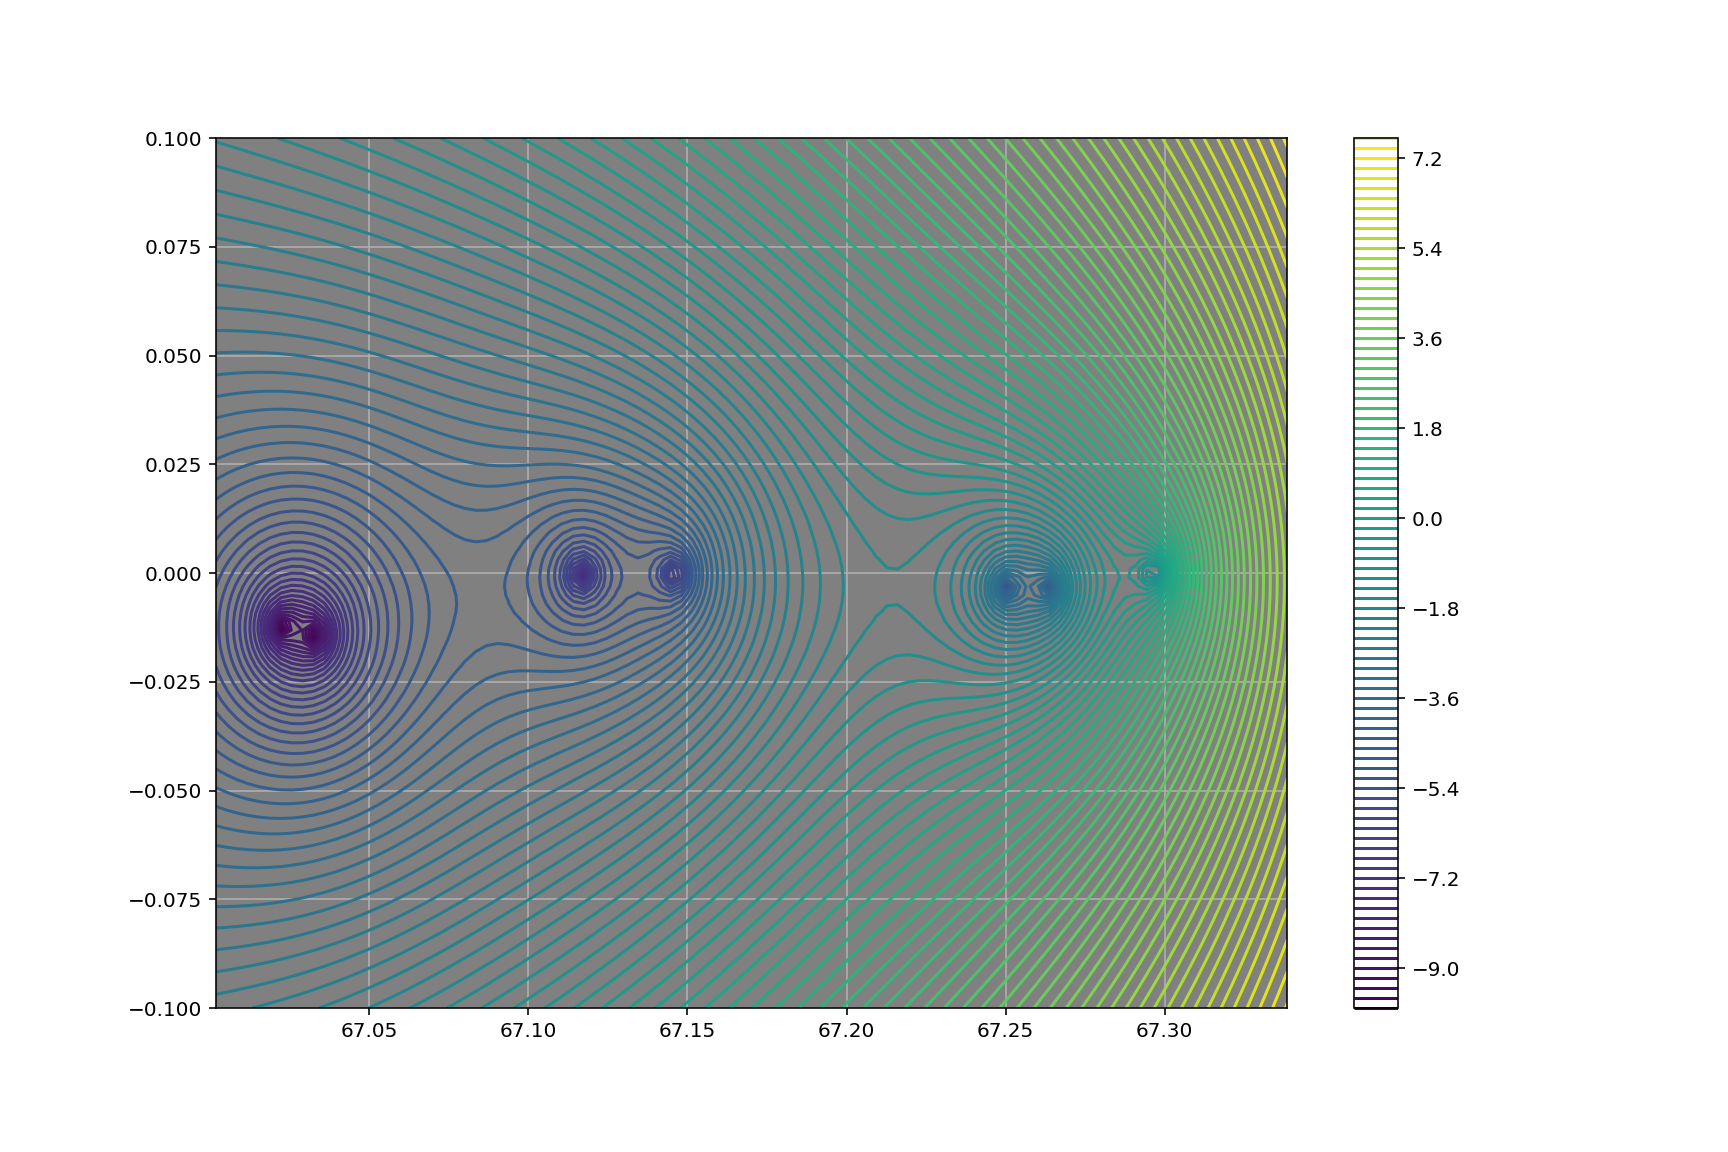

In [100]:
%matplotlib notebook
plotlogf(A.determinant, .995*k_low, 1.000001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

<IPython.core.display.Javascript object>


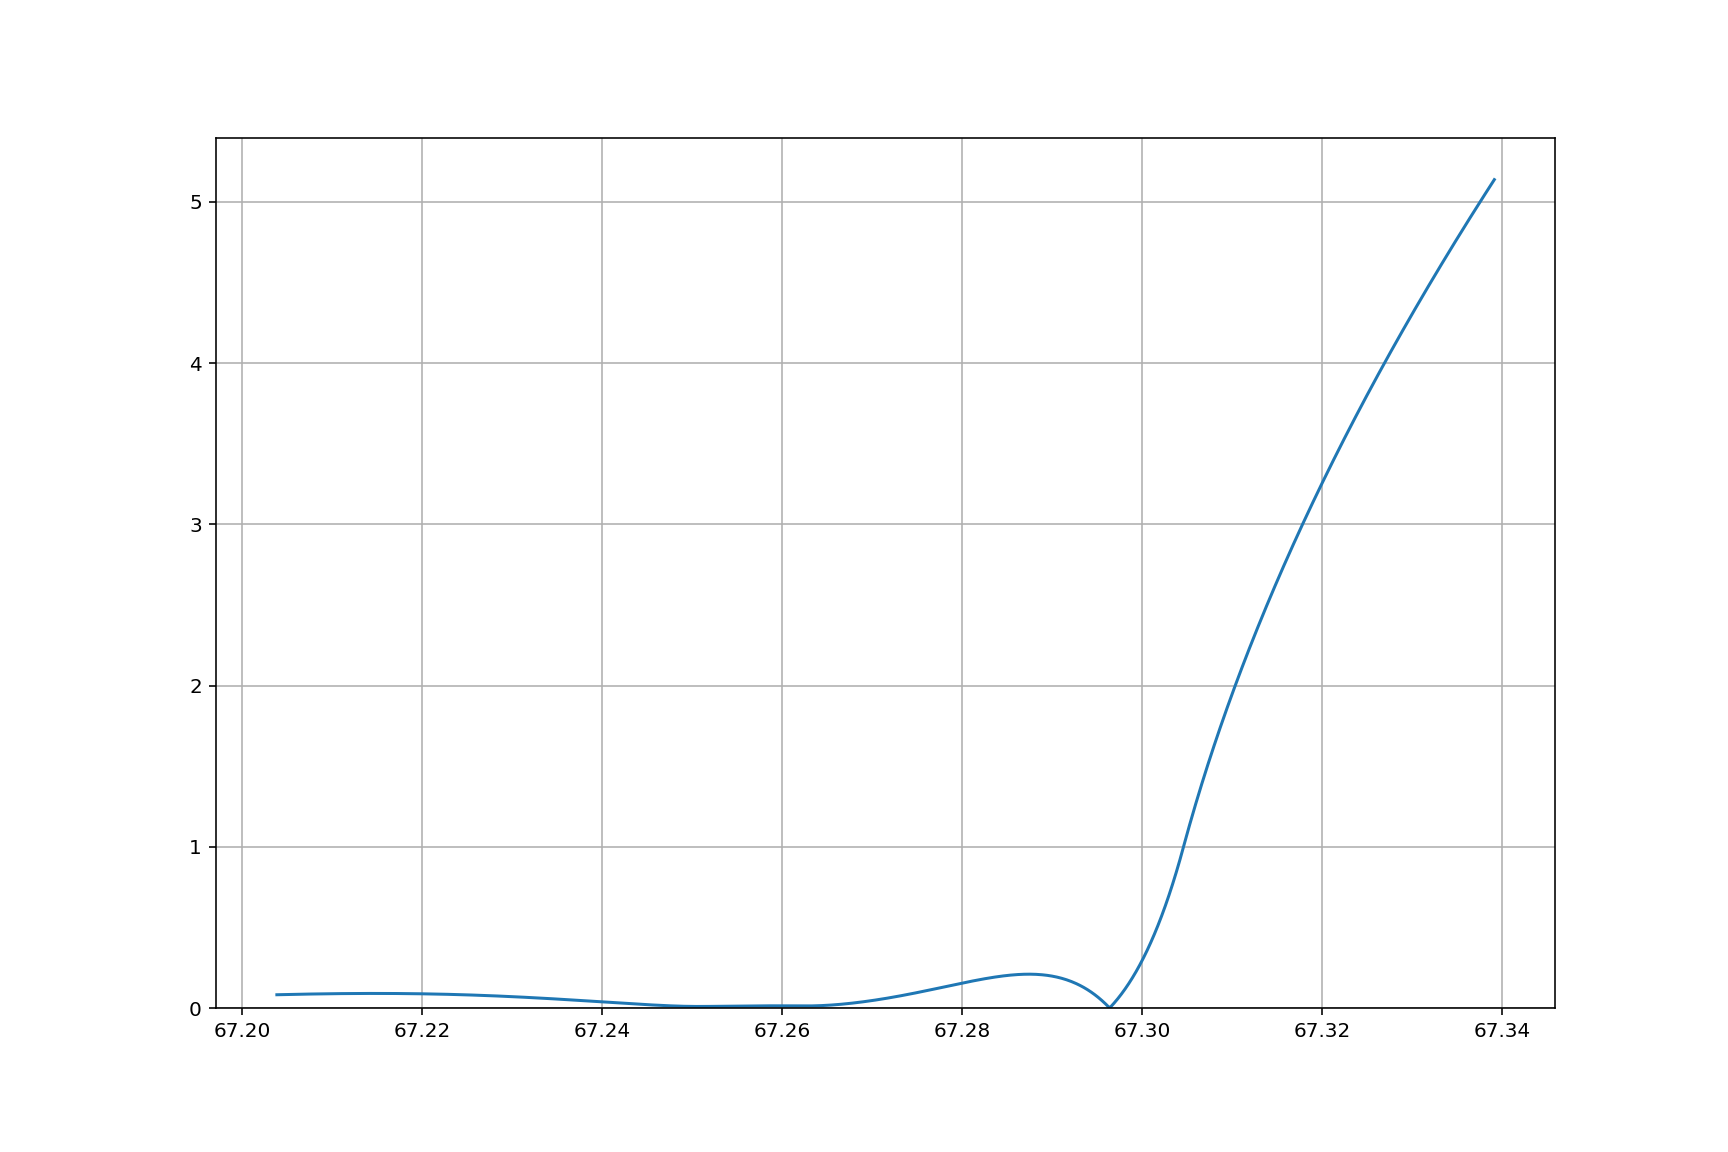

In [101]:
plotlogf_real(A.determinant, .998*k_low, 1.00001*k_low, nu, outer)

In [102]:
guess = np.array(67.3)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (67.2964070610992-1.4391396900074182e-05j) . Residual of determinant:  2.2039823073910938e-13


# Bragg Exact Fields

In [103]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [104]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

## Hybrid Transverse fields

In [34]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# TE/TM fields

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .995*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(.999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# Appears beta with higher real part was TM, now for TE

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .995*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(.997*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

## Etv

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})

## Htv

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})